In [23]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt



In [24]:
market_pca = pd.read_csv('/Users/varshamj/Downloads/social_marketing.csv')
market_pca.head()

,Unnamed: 0,chatter,current_events,travel,photo_sharing,uncategorized,tv_film,sports_fandom,politics,food,...,religion,beauty,parenting,dating,school,personal_fitness,fashion,small_business,spam,adult
0,hmjoe4g3k,2,0,2,2,2,1,1,0,4,...,1,0,1,1,0,11,0,0,0,0
1,clk1m5w8s,3,3,2,1,1,1,4,1,2,...,0,0,0,1,4,0,0,0,0,0
2,jcsovtak3,6,3,4,3,1,5,0,2,1,...,0,1,0,1,0,0,1,0,0,0
3,3oeb4hiln,1,5,2,2,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,fd75x1vgk,5,2,0,6,1,0,0,2,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
market_new_pca = market_pca.rename(columns={'Unnamed: 0': 'user_id'}).set_index('user_id')


In [26]:
#EDA
summary_stats_pca = market_new_pca.describe()
print(summary_stats_pca)


           chatter  current_events       travel  photo_sharing  uncategorized  \
count  7882.000000     7882.000000  7882.000000    7882.000000    7882.000000   
mean      4.398757        1.526262     1.585004       2.696777       0.812992   
std       3.529126        1.268890     2.285530       2.731510       0.935853   
min       0.000000        0.000000     0.000000       0.000000       0.000000   
25%       2.000000        1.000000     0.000000       1.000000       0.000000   
50%       3.000000        1.000000     1.000000       2.000000       1.000000   
75%       6.000000        2.000000     2.000000       4.000000       1.000000   
max      26.000000        8.000000    26.000000      21.000000       9.000000   

           tv_film  sports_fandom     politics         food       family  ...  \
count  7882.000000    7882.000000  7882.000000  7882.000000  7882.000000  ...   
mean      1.070287       1.594012     1.788632     1.397488     0.863867  ...   
std       1.658783       2.

In [27]:
spam_distribution_pca = market_new_pca['spam'].value_counts()
adult_distribution_pca = market_new_pca['adult'].value_counts()

In [28]:
# data standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
market_new_pca = scaler.fit_transform(market_new_pca)


In [29]:
# Dimensionality Reduction with PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
market_pca = pca.fit_transform(market_new_pca)


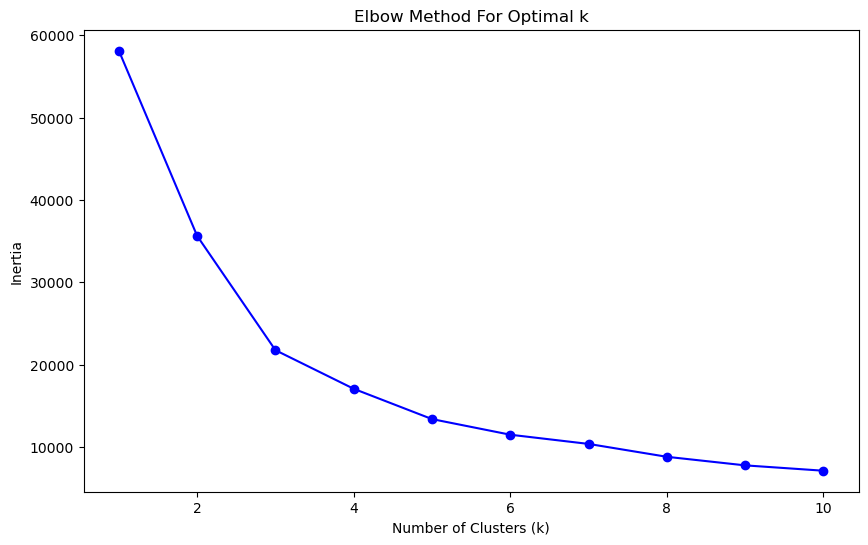

In [30]:
# K- means clustering 
from sklearn.cluster import KMeans
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(market_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


In [31]:
# apply K- means clustering 

kmeans_pca = KMeans(n_clusters=4, random_state=42)
clusters = kmeans_pca.fit_predict(market_pca)
market_new_pca = pd.DataFrame(market_new_pca)

market_new_pca = market_new_pca.reset_index(drop=True)  # Resets the index if there's any issue
market_new_pca['Cluster'] = clusters

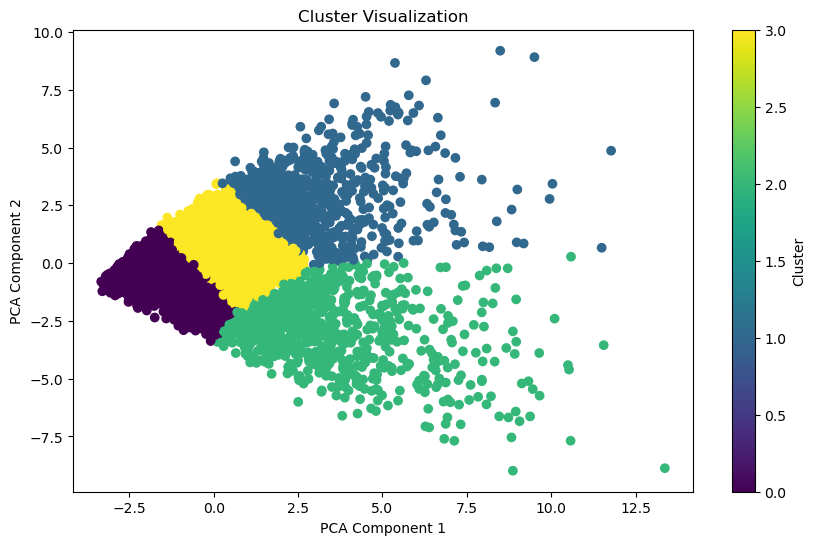

In [32]:
# Visualize and Analyze the Clusters
plt.figure(figsize=(10, 6))
plt.scatter(market_pca[:, 0], market_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Visualization')
plt.colorbar(label='Cluster')
plt.show()

In [33]:
cluster_means = market_new_pca.groupby('Cluster').mean()
print(cluster_means)

               0         1         2         3         4         5         6   \
Cluster                                                                         
0       -0.346812 -0.200666 -0.196603 -0.437463 -0.224617 -0.208798 -0.313853   
1        0.785285  0.358812  0.411146  1.314887  0.617019  0.423157 -0.057757   
2       -0.123543  0.130212  0.077580 -0.137753 -0.091367  0.009012  1.961292   
3        0.282129  0.128315  0.123110  0.248329  0.152373  0.158588 -0.170692   

               7         8         9   ...        26        27        28  \
Cluster                                ...                                 
0       -0.211719 -0.376425 -0.298061  ... -0.328575 -0.338652 -0.337040   
1        0.387886  0.224213  0.209378  ... -0.013810  1.288659  0.048661   
2        0.109741  1.700463  1.409211  ...  2.081270  0.232000  1.956502   
3        0.141356 -0.087041 -0.099096  ... -0.202335 -0.001639 -0.169856   

               29        30        31        32        3

In [34]:
market = pd.read_csv('/Users/varshamj/Downloads/social_marketing.csv')
market.head()

,Unnamed: 0,chatter,current_events,travel,photo_sharing,uncategorized,tv_film,sports_fandom,politics,food,...,religion,beauty,parenting,dating,school,personal_fitness,fashion,small_business,spam,adult
0,hmjoe4g3k,2,0,2,2,2,1,1,0,4,...,1,0,1,1,0,11,0,0,0,0
1,clk1m5w8s,3,3,2,1,1,1,4,1,2,...,0,0,0,1,4,0,0,0,0,0
2,jcsovtak3,6,3,4,3,1,5,0,2,1,...,0,1,0,1,0,0,1,0,0,0
3,3oeb4hiln,1,5,2,2,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,fd75x1vgk,5,2,0,6,1,0,0,2,0,...,0,0,0,0,0,0,0,1,0,0


In [35]:
market_new = market.rename(columns={'Unnamed: 0': 'user_id'}).set_index('user_id')


In [36]:
#EDA
summary_stats = market_new.describe()
print(summary_stats)


           chatter  current_events       travel  photo_sharing  uncategorized  \
count  7882.000000     7882.000000  7882.000000    7882.000000    7882.000000   
mean      4.398757        1.526262     1.585004       2.696777       0.812992   
std       3.529126        1.268890     2.285530       2.731510       0.935853   
min       0.000000        0.000000     0.000000       0.000000       0.000000   
25%       2.000000        1.000000     0.000000       1.000000       0.000000   
50%       3.000000        1.000000     1.000000       2.000000       1.000000   
75%       6.000000        2.000000     2.000000       4.000000       1.000000   
max      26.000000        8.000000    26.000000      21.000000       9.000000   

           tv_film  sports_fandom     politics         food       family  ...  \
count  7882.000000    7882.000000  7882.000000  7882.000000  7882.000000  ...   
mean      1.070287       1.594012     1.788632     1.397488     0.863867  ...   
std       1.658783       2.

In [37]:
spam_distribution = market_new['spam'].value_counts()
adult_distribution = market_new['adult'].value_counts()



In [38]:
# data standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
market_new = scaler.fit_transform(market_new)


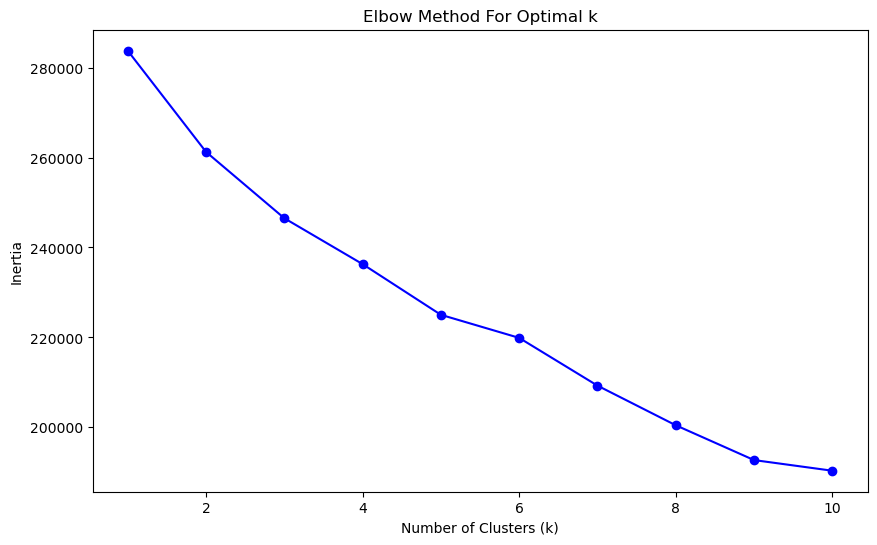

In [39]:
# K- means clustering 
from sklearn.cluster import KMeans
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(market_new)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


In [40]:
# apply K- means clustering 

kmeans_pca = KMeans(n_clusters=4, random_state=42)
clusters = kmeans_pca.fit_predict(market_new)
market_new = pd.DataFrame(market_new)

market_new = market_new.reset_index(drop=True)  # Resets the index if there's any issue
market_new['Cluster'] = clusters

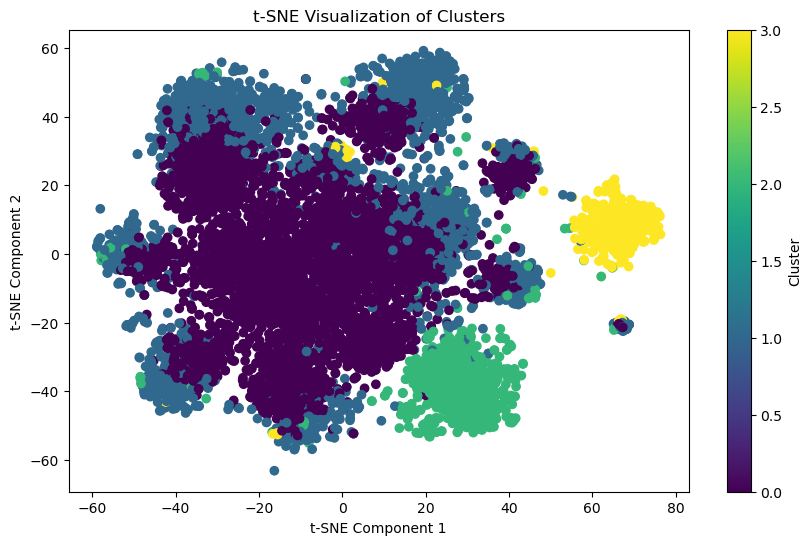

In [41]:
market_new.columns = market_new.columns.astype(str)

from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(market_new)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=market_new['Cluster'], cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Clusters')
plt.colorbar(label='Cluster')
plt.show()


In [42]:
# Visualize and Analyze the Clusters
cluster_means = market_new.groupby('Cluster').mean()
print(cluster_means)


                0         1         2         3         4         5         6  \
Cluster                                                                         
0       -0.225592 -0.125676 -0.148537 -0.320205 -0.151003 -0.148539 -0.280180   
1        0.578328  0.247521  0.356481  0.769084  0.368343  0.284341 -0.112558   
2       -0.097874  0.135027 -0.025797 -0.071812 -0.081231 -0.007136  1.997909   
3       -0.074355 -0.040402 -0.007361  0.010333  0.063834  0.287844 -0.099254   

                7         8         9  ...        26        27        28  \
Cluster                                ...                                 
0       -0.143573 -0.330328 -0.271651  ... -0.297995 -0.280237 -0.303250   
1        0.400987  0.077132  0.030320  ... -0.140523  0.557650 -0.077510   
2       -0.110531  1.792186  1.417233  ...  2.205169  0.306266  2.073695   
3       -0.110976 -0.065150  0.198474  ... -0.154283 -0.125405 -0.150573   

               29        30        31        32        3